# ft_linear_regression

<p>The aim of this project is to introduce you to the basic concept behind machine learning.
For this project, you will have to create a program that predicts the price of a car by
using a linear function train with a gradient descent algorithm.</p>

### Import libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load dataset

In [71]:
df = pd.read_csv('data.csv')

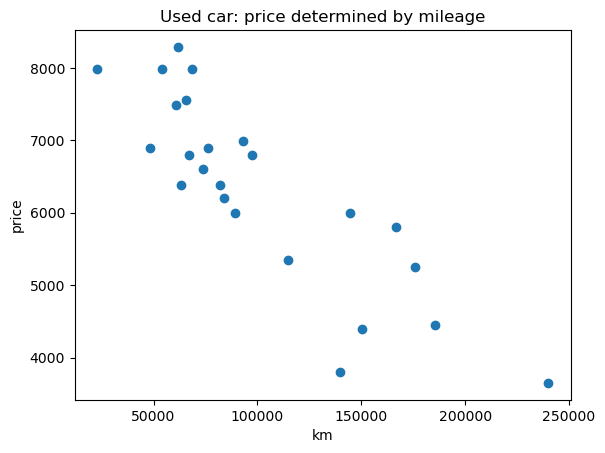

In [93]:
df.shape
df.head(24)
plt.scatter(df['km'], df['price'])
plt.xlabel('km')
plt.ylabel('price')
plt.title('Used car: price determined by mileage')

- <strong>Dataset</strong>: feature = km, target = price, m=24, n=1
- <strong>Model</strong>: at first, we don't a and b values, therefore we will start with random values $$f(x) = ax + b$$
- <strong>Cost function (Mean sqared error)</strong>:
	- Convex function
	- Euclidian distance avoids negative values 
	- Multiply by $ \frac{1}{2} $ to simplify computation later $$J(a, b) = \frac{1}{2m} \sum_{i=1}^m (f(x_i) - y_i)^2$$
- <strong>Gradients</strong>: $$ \frac{\partial J(a, b)}{\partial a} = \frac{1}{m} \sum_{i = 1}^m x_i (ax_i + b - y_i)$$ $$ \frac{\partial J(a, b)}{\partial b} = \frac{1}{m} \sum_{i = 1}^m (ax_i + b - y_i)$$
- <strong>Gradient descent algorithm</strong>: $$ a = a - \alpha \frac{\partial J(a,b)}{\partial a}$$ $$ b = b - \alpha \frac{\partial J(a,b)}{\partial b}$$

### Derived gradient functions explanation

$$ J(a, b) = \frac{1}{2m} \sum (ax + b - y)^2 $$
J(a, b) is composed of two functions (g ◦ f)(a, b):
$$ f(a, b) = ax + b$$
$$ g(f) = f^2 $$
As a reminder:
$$ (g ◦ f)' = f' * g'(f) $$

### Model matrix computation

$$ F = X . \theta $$
We want a matrix as such: $$ F = \begin{bmatrix} f(x_1) \\ f(x_2) \\ \dots \\ f(x_m) \end{bmatrix} $$
With:
$$ X =\begin{bmatrix} x_1 & 1\\ x_2 & 1 \\ \vdots & 1 \\ x_n & 1 \\ \end{bmatrix} $$
$$ \theta = \begin{bmatrix}a \\ b \end{bmatrix}

Matrix formats are:
$$ F = m * 1 $$
$$ X = m * (n + 1) $$
$$ \theta = (n + 1) * 1 $$

### Cost Function matrix computation

$$ J(a, b) = \frac{1}{2m} \sum (ax + b - y)^2 $$
becomes:
$$ J(\theta) = \frac{1}{2m} \sum (X\theta - y)^2 $$

### Gradient

As a reminder: 
$$ \frac{\partial J(a, b)}{\partial a} = \frac{1}{m} \sum_{i = 1}^m x_i (ax_i + b - y_i)$$
$$ \frac{\partial J(a, b)}{\partial b} = \frac{1}{m} \sum_{i = 1}^m (ax_i + b - y_i)$$
Derivative functions would be set in a (n + 1) * 1:
$$ \frac{\partial J(a, b)}{\partial \theta} =\begin{bmatrix}  \frac{\partial J(a, b)}{\partial a} \\ \frac{\partial J(a, b)}{\partial b} \end{bmatrix} $$
Computation:
$$ \frac{\partial J(a, b)}{\partial \theta} = \frac{1}{m} X^T (X\theta - Y) $$
With:
$$ X^T = \begin{bmatrix} x_1 & x_2 & \dots & x_m \\ 1 & 1 & \dots & 1 \end{bmatrix}

### Gradient descent algorithm - Matrix computation

As a reminder:
$$ a = a - \alpha \frac{\partial J(a,b)}{\partial a}$$
$$ b = b - \alpha \frac{\partial J(a,b)}{\partial b}$$
Let's put them in a (n + 1) * 1 matrix:
$$ \begin{bmatrix} a \\ b \end{bmatrix} = \begin{bmatrix} a - \alpha \frac{\partial J(a,b)}{\partial a} \\ b  - \alpha \frac{\partial J(a,b)}{\partial b} \end{bmatrix} $$
Which can be transfor to:
$$ \theta = \theta - \alpha \frac{\partial J}{\partial \theta} $$


## Apply formula to dataset

In [73]:
x = np.array(df['km'], dtype = float)
y = np.array(df['price'], dtype = float)
x_min = np.min(x)
x_range = np.max(x) - x_min
x = (x - x_min) / x_range

print(x)
print(y)
print(x.shape)
print(y.shape)
print(x.dtype)
print(y.dtype)

[1.         0.53846366 0.58774948 0.74910295 0.70520633 0.42330989
 0.66282974 0.30447119 0.56011257 0.28144044 0.27236171 0.18498763
 0.23537893 0.34362347 0.20313587 0.24470638 0.11670144 0.3228958
 0.17526405 0.19702811 0.1432559  0.21004509 0.         0.17913321]
[3650. 3800. 4400. 4450. 5250. 5350. 5800. 5990. 5999. 6200. 6390. 6390.
 6600. 6800. 6800. 6900. 6900. 6990. 7490. 7555. 7990. 7990. 7990. 8290.]
(24,)
(24,)
float64
float64


In [74]:
y = y.reshape(y.shape[0], 1)
X = x.reshape(x.shape[0], 1)
X = np.hstack((X, np.ones(X.shape)))
print(X)
print(y)
print(X.shape)
print(y.shape)

[[1.         1.        ]
 [0.53846366 1.        ]
 [0.58774948 1.        ]
 [0.74910295 1.        ]
 [0.70520633 1.        ]
 [0.42330989 1.        ]
 [0.66282974 1.        ]
 [0.30447119 1.        ]
 [0.56011257 1.        ]
 [0.28144044 1.        ]
 [0.27236171 1.        ]
 [0.18498763 1.        ]
 [0.23537893 1.        ]
 [0.34362347 1.        ]
 [0.20313587 1.        ]
 [0.24470638 1.        ]
 [0.11670144 1.        ]
 [0.3228958  1.        ]
 [0.17526405 1.        ]
 [0.19702811 1.        ]
 [0.1432559  1.        ]
 [0.21004509 1.        ]
 [0.         1.        ]
 [0.17913321 1.        ]]
[[3650.]
 [3800.]
 [4400.]
 [4450.]
 [5250.]
 [5350.]
 [5800.]
 [5990.]
 [5999.]
 [6200.]
 [6390.]
 [6390.]
 [6600.]
 [6800.]
 [6800.]
 [6900.]
 [6900.]
 [6990.]
 [7490.]
 [7555.]
 [7990.]
 [7990.]
 [7990.]
 [8290.]]
(24, 2)
(24, 1)


In [75]:
theta = np.random.randn(2, 1)
print(theta)
print(theta.shape)

[[-0.36002873]
 [-1.21102108]]
(2, 1)


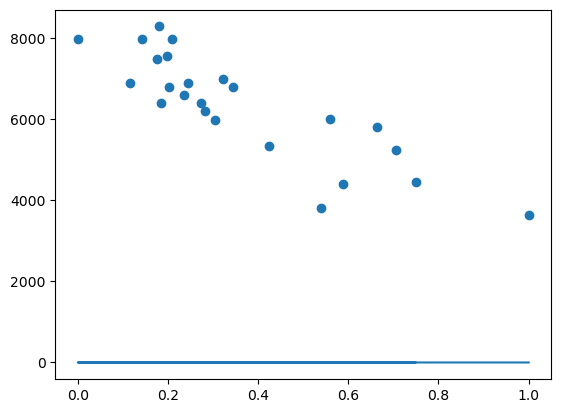

In [76]:
plt.scatter(x, y)
plt.plot(x, X.dot(theta))

In [77]:
def cost_function(X, Y, theta):
    m = len(Y)
    return 1/(2*m) * np.sum((X.dot(theta) - y) ** 2)

In [78]:
cost_function(X, y, theta)

20888914.38405331

### Gradients and gradient descent

In [79]:
def grad(X, y, theta):
	m = len(y)
	return 1/m * X.T.dot(model(X, theta) - y)

In [80]:
def gradient_descent(X, y ,theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0,  n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

## Train the model

In [81]:
print(X)
print(y)
print(theta)

[[1.         1.        ]
 [0.53846366 1.        ]
 [0.58774948 1.        ]
 [0.74910295 1.        ]
 [0.70520633 1.        ]
 [0.42330989 1.        ]
 [0.66282974 1.        ]
 [0.30447119 1.        ]
 [0.56011257 1.        ]
 [0.28144044 1.        ]
 [0.27236171 1.        ]
 [0.18498763 1.        ]
 [0.23537893 1.        ]
 [0.34362347 1.        ]
 [0.20313587 1.        ]
 [0.24470638 1.        ]
 [0.11670144 1.        ]
 [0.3228958  1.        ]
 [0.17526405 1.        ]
 [0.19702811 1.        ]
 [0.1432559  1.        ]
 [0.21004509 1.        ]
 [0.         1.        ]
 [0.17913321 1.        ]]
[[3650.]
 [3800.]
 [4400.]
 [4450.]
 [5250.]
 [5350.]
 [5800.]
 [5990.]
 [5999.]
 [6200.]
 [6390.]
 [6390.]
 [6600.]
 [6800.]
 [6800.]
 [6900.]
 [6900.]
 [6990.]
 [7490.]
 [7555.]
 [7990.]
 [7990.]
 [7990.]
 [8290.]]
[[-0.36002873]
 [-1.21102108]]


In [82]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate 
                               = 0.5, n_iterations = 1000)

In [83]:
theta_final

array([[-4656.59144464],
       [ 8008.43983262]])

In [84]:
cost_function(X, y, theta_final)

222822.62253563676

In [85]:
predictions = model(X, theta_final)

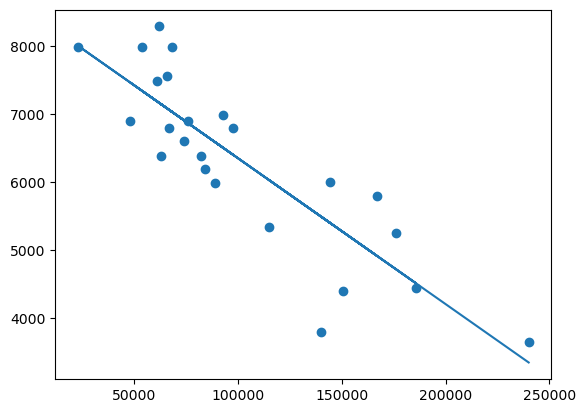

In [86]:
plt.scatter(df['km'], df['price'])
plt.plot(df['km'], predictions)

## Estimate the price of a vehicle according to an input given mileage

In [87]:
def estimate(estimation: float, theta: np.array = [[0],[0]]) -> float:
	user_input_normalized = (estimation - x_min) / x_range
	return user_input_normalized * theta[0] + theta[1]

In [88]:
estimation = 74000.0
price = estimate(estimation, theta_final)
print(price)

[6912.37634414]


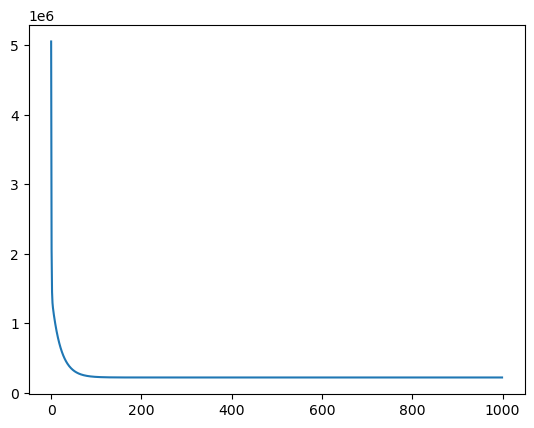

In [89]:
plt.plot(range(1000), cost_history)

In [90]:
def coeff_determination(y, pred):
    u = ((y - pred) ** 2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u / v

In [91]:
coeff_determination(y, predictions)

0.7329747078314965